# 2021_02_03_Problema 1

En la siguiente tabla se presenta una muestra de entrenamiento no linealmente separable y los correspondientes multiplicadores de Lagrange óptimos obtenidos al entrenar una máquina de vectores soporte con esta muestra (y C=10):
$$\begin{array}{|l||rrrrr|}
\hline
i     &  1 &  2 &  3 &  4 &  5 \\
\hline
x_{i1} &  1 &  1 &  1 &  1 &  1 \\
x_{i2} &  3 &  4 &  2 &  5 &  1 \\
\hline
\text{Clase} & -1 & +1 & +1 & -1 & +1  \\
\hline
\hline
\alpha^\star_i & 10 & 10 & 3.56 & 3.56 & 0 \\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente
2. Representar gráficamente la frontera lineal de separación entre clases y las muestras de entrenamiento, indicando cuáles son vectores soporte
3. Clasificar la muestra $(1,3.5)^t$

## Solución

**Pesos de la función discriminante:**

$\boldsymbol{\theta}^\star = c_1~\alpha^\star_1~\boldsymbol{x_1} 
              + c_2~\alpha^\star_2~\boldsymbol{x_2} 
              + c_3~\alpha^\star_3~\boldsymbol{x_3} 
              + c_4~\alpha^\star_4~\boldsymbol{x_4}~\approx~(0.0,-0.67)$

Usando el vector soporte $\boldsymbol{x_4}$ (que verifica la condición : $0 < \alpha_4^* < C$)

$\theta^\star_0 = c_4-{\boldsymbol{\theta}^\star}^t\boldsymbol{x_4} \approx 2.33$

**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación: $\; 2.33 -  0.67~x_2 ~=~ 0$ 

Ecuaciones de los márgenes: $\; 2.33 -  0.67~x_2 ~=+1\;$ y $\; 2.33 -  0.67~x_2 ~=-1$

Los vectores de entrenamiento son todos los de la tabla.  De ellos,
los vectores soporte son: $(1,3)^t, (1,4)^t, (1,2)^t, (1,5)^t$.

Representación gráfica:
<div><img src="2021_02_03_Problema 1.png" width=400></div>

**Clasificación de la muestra $(1,3.5)^t$:**

El valor de la función discriminante para este vector es:
$~ 2.33 -  0.67~x_2~\approx~-0.015 < 0 ~\Rightarrow\,$ clase -1.


## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[1, 3], [1, 4], [1, 2], [1, 5], [1, 1]]).astype(np.float32)
y = np.array([-1, 1, 1, -1, 1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w); 
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 2), ' margen:', round(m, 4), ' t:', t)
Z = [[1, 3.5]]; print('Clase de', Z[0],':',clf.predict(Z)[0])

alfa:  [10.     10.      3.5556  3.5556  0.    ]
w: [ 0.     -0.6667]  w0: 2.33  margen: 3.0  t: [ 1.3333  1.3333  0.     -0.      0.    ]
Clase de [1, 3.5] : 1


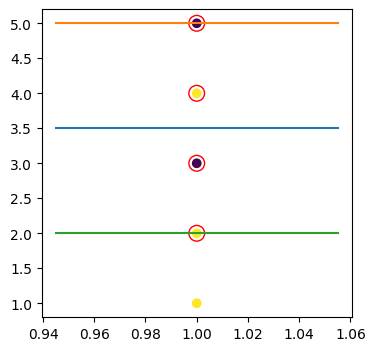

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');